# Quasi-Monte Carlo techniques 


_Seminar/Lecture in progress_ 



xrand_gen: <class 'generator'>


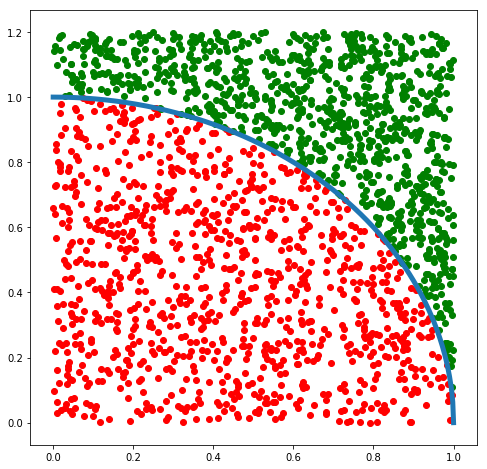

pi: 3.141592653589793
est_pi =  3.139848
est_pi2 = 3.14263727596
numerical =  3.1415926535897922
<generator object <genexpr> at 0x7f1c8e7f14c0>
est_pi3 = 3.1415926535


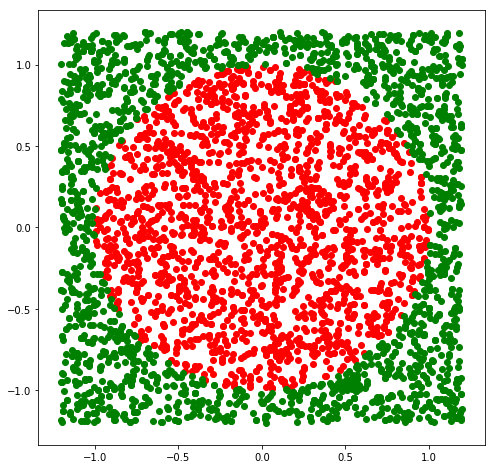

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad

%matplotlib inline

def circle(x, y):
    return np.sqrt(x**2+y**2)<=1

def circle2(x):
    return np.sqrt(1-x**2)

xgrid = np.linspace(-1, 1, 500)
ygrid = np.linspace(-1, 1, 500)
x, y = np.meshgrid(xgrid, ygrid)

xgrid2 = np.linspace(0, 1, 500)
z2 = circle2(xgrid2)

z = circle(x,y)
max_y = 1.2
x_rand = np.random.uniform(0,1,1000000)
y_rand = np.random.uniform(0,max_y,1000000)

x_spacing = np.linspace(0, 1, 500000)
x_rand_gen = (np.random.uniform(x_spacing[i],x_spacing[i+1],1000) for i in range(len(x_spacing)-1))

print("xrand_gen:",type(x_rand_gen))

    
x_acc = x_rand[y_rand<=circle2(x_rand)]
x_rej = x_rand[y_rand>circle2(x_rand)]

y_acc = y_rand[y_rand<=circle2(x_rand)]
y_rej = y_rand[y_rand>circle2(x_rand)]

sampling_plot_acc = np.random.randint(0,np.size(x_acc),1000)
sampling_plot_rej = np.random.randint(0,np.size(x_rej),1000)

fig7, ax7 = plt.subplots(figsize=(8,8))
ax7.plot(xgrid2,z2,linewidth=5)
ax7.scatter(x_acc[sampling_plot_acc],y_acc[sampling_plot_acc],c='r')
ax7.scatter(x_rej[sampling_plot_rej],y_rej[sampling_plot_rej],c='g')
plt.show()

est_pi = 4*np.size(x_acc)/np.size(x_rand) * max_y
print("pi:",np.pi)
print("est_pi = ",est_pi)

int2 = np.mean(circle2(x_rand))
int3, int3_err = quad(circle2,0,1)
print("est_pi2 =", 4*int2)
print("numerical = ",4*int3)

temp_t4 = ((np.sum(circle2(xx_rand)), len(xx_rand)) for xx_rand in x_rand_gen)
print(temp_t4)
int4 = [0,0]
for temp_sum,temp_len in temp_t4:
    #print(temp_sum, temp_len)
    int4[0] += temp_sum
    int4[1] += temp_len
int4_1 = int4[0]/int4[1]
#int4 = np.mean(temp_t4)
print("est_pi3 =", 4*int4_1)


x_rand2 = np.random.uniform(-1.2,1.2,10000)
y_rand2 = np.random.uniform(-1.2,1.2,10000)

z = circle(x_rand2,y_rand2)

xr3 = x_rand2[z>0]
yr3 = y_rand2[z>0]
xr4 = x_rand2[z==False]
yr4 = y_rand2[z==False]

sampling_plot_acc2 = np.random.randint(0,np.size(xr3),2000)
sampling_plot_rej2 = np.random.randint(0,np.size(xr4),2000)


fig7_1, ax7_1 = plt.subplots(figsize=(8,8))
ax7_1.scatter(xr3[sampling_plot_acc2],yr3[sampling_plot_acc2],c='r')
ax7_1.scatter(xr4[sampling_plot_rej2],yr4[sampling_plot_rej2],c='g')
plt.show()

